<a href="https://colab.research.google.com/github/Jarjoshi273/AIR_QUALITY_INDEX/blob/master/otomoto_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/ML dataset/otomoto_price_prediction_data.csv')

In [ ]:
df.head()

,make,model,vehicle_year,mileage,engine_capacity,engine_power,gearbox,fuel_type,damaged,is_business,target_price
0,audi,a6,2013,153817.0,1984.0,180.0,automatic,petrol,0,0,69900.0
1,skoda,fabia,2004,115000.0,1390.0,75.0,manual,petrol,0,1,8299.0
2,chevrolet,camaro,2012,299000.0,3600.0,323.0,automatic,petrol,0,1,54500.0
3,bmw,seria-3,2013,155000.0,1995.0,163.0,automatic,diesel,0,0,62000.0
4,renault,talisman,2017,167000.0,1600.0,130.0,automatic,diesel,0,1,52999.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206207 entries, 0 to 206206
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   make             206207 non-null  object 
 1   model            206207 non-null  object 
 2   vehicle_year     206207 non-null  int64  
 3   mileage          204853 non-null  float64
 4   engine_capacity  204029 non-null  float64
 5   engine_power     204628 non-null  float64
 6   gearbox          204842 non-null  object 
 7   fuel_type        206207 non-null  object 
 8   damaged          206207 non-null  int64  
 9   is_business      206207 non-null  int64  
 10  target_price     206207 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 17.3+ MB


In [ ]:
df.isna().sum()

make                  0
model                 0
vehicle_year          0
mileage            1354
engine_capacity    2178
engine_power       1579
gearbox            1365
fuel_type             0
damaged               0
is_business           0
target_price          0
dtype: int64

In [ ]:
df.gearbox.mode()[0]

'manual'

In [ ]:
#Lets do the replacement
df.gearbox.fillna( df.gearbox.mode()[0] , inplace= True)

In [ ]:
df.mileage.mean()

665678.7207656222

In [ ]:
df.mileage.fillna(df.mileage.mean(),inplace= True)

In [ ]:
df.engine_capacity.fillna(df.engine_capacity.mean(), inplace=True)

In [ ]:
df.engine_power.fillna(df.engine_power.mean(), inplace=True)

In [ ]:
df.isna().sum()

make               0
model              0
vehicle_year       0
mileage            0
engine_capacity    0
engine_power       0
gearbox            0
fuel_type          0
damaged            0
is_business        0
target_price       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206207 entries, 0 to 206206
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   make             206207 non-null  object 
 1   model            206207 non-null  object 
 2   vehicle_year     206207 non-null  int64  
 3   mileage          206207 non-null  float64
 4   engine_capacity  206207 non-null  float64
 5   engine_power     206207 non-null  float64
 6   gearbox          206207 non-null  object 
 7   fuel_type        206207 non-null  object 
 8   damaged          206207 non-null  int64  
 9   is_business      206207 non-null  int64  
 10  target_price     206207 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 17.3+ MB


In [ ]:
df.corr()

,vehicle_year,mileage,engine_capacity,engine_power,damaged,is_business,target_price
vehicle_year,1.000000,0.000839,-0.146650,0.165742,0.025219,0.328391,0.444574
mileage,0.000839,1.000000,0.003291,0.004082,0.010760,0.001972,-0.000737
engine_capacity,-0.146650,0.003291,1.000000,0.799662,0.029111,-0.114042,0.375255
engine_power,0.165742,0.004082,0.799662,1.000000,0.027028,-0.002895,0.650005
damaged,0.025219,0.010760,0.029111,0.027028,1.000000,-0.007196,-0.069221
is_business,0.328391,0.001972,-0.114042,-0.002895,-0.007196,1.000000,0.220689
target_price,0.444574,-0.000737,0.375255,0.650005,-0.069221,0.220689,1.000000


In [ ]:
len(df.gearbox.unique())

10

In [ ]:
len(df.fuel_type.unique())

7

In [ ]:
type_dummies = pd.get_dummies(df['gearbox'],drop_first=True)
#df = pd.concat([df,type_dummies],axis=1)

In [ ]:
type_dummies.head(2)

,automatic,automatic-sequential,automatic-stepless,automatic-stepless-sequential,cvt,dual-clutch,manual,manual-sequential,semi-automatic
0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0


In [ ]:
df = pd.concat([df,type_dummies],axis=1)

In [ ]:
#Deal with Categorical Data
#
# gearbox ----- Strategy : Dummy Variable Creation
#fuel_type -----Strategy : Dummy Variable Creation


In [ ]:
dummy= pd.get_dummies(df['fuel_type'],drop_first=True)

In [ ]:
df = pd.concat([df,dummy],axis=1)

In [ ]:
del(df['fuel_type'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206207 entries, 0 to 206206
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   make                           206207 non-null  object 
 1   model                          206207 non-null  object 
 2   vehicle_year                   206207 non-null  int64  
 3   mileage                        206207 non-null  float64
 4   engine_capacity                206207 non-null  float64
 5   engine_power                   206207 non-null  float64
 6   gearbox                        206207 non-null  object 
 7   damaged                        206207 non-null  int64  
 8   is_business                    206207 non-null  int64  
 9   target_price                   206207 non-null  float64
 10  automatic                      206207 non-null  uint8  
 11  automatic-sequential           206207 non-null  uint8  
 12  automatic-stepless            

In [ ]:
df.head()

,make,model,vehicle_year,mileage,engine_capacity,engine_power,gearbox,damaged,is_business,target_price,automatic,automatic-sequential,automatic-stepless,automatic-stepless-sequential,cvt,dual-clutch,manual,manual-sequential,semi-automatic,electric,etanol,hybrid,petrol,petrol-cng,petrol-lpg
0,audi,a6,2013,153817.0,1984.0,180.0,automatic,0,0,69900.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,skoda,fabia,2004,115000.0,1390.0,75.0,manual,0,1,8299.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,chevrolet,camaro,2012,299000.0,3600.0,323.0,automatic,0,1,54500.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,bmw,seria-3,2013,155000.0,1995.0,163.0,automatic,0,0,62000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,renault,talisman,2017,167000.0,1600.0,130.0,automatic,0,1,52999.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
len(df['model'].unique())

1165

In [ ]:
del df['gearbox']

In [ ]:
df.head(2)

,make,model,vehicle_year,mileage,engine_capacity,engine_power,damaged,is_business,target_price,automatic,automatic-sequential,automatic-stepless,automatic-stepless-sequential,cvt,dual-clutch,manual,manual-sequential,semi-automatic,electric,etanol,hybrid,petrol,petrol-cng,petrol-lpg
0,audi,a6,2013,153817.0,1984.0,180.0,0,0,69900.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,skoda,fabia,2004,115000.0,1390.0,75.0,0,1,8299.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
df.model.unique()

array(['a6', 'fabia', 'camaro', ..., 'grand-prix', 'xt5', 'aurora'],
      dtype=object)

In [ ]:
# let's obtain the counts for each one of the labels in variable model
# let's capture this in a dictionary that we can use to re-map the labels

df.model.value_counts().to_dict()

{'astra': 5573,
 'golf': 4493,
 'a4': 4241,
 'octavia': 4194,
 'seria-3': 4029,
 'passat': 3887,
 'focus': 3820,
 'seria-5': 3260,
 'mondeo': 3158,
 'a6': 3000,
 'megane': 2531,
 'insignia': 2440,
 'corsa': 2425,
 'fabia': 2202,
 'a3': 2175,
 'klasa-e': 2117,
 'fiesta': 2018,
 'qashqai': 1917,
 'superb': 1891,
 'avensis': 1885,
 'klasa-c': 1879,
 'leon': 1834,
 'clio': 1805,
 'yaris': 1773,
 'ceed': 1712,
 'i30': 1639,
 'auris': 1625,
 'corolla': 1624,
 'seria-1': 1561,
 'civic': 1525,
 '6': 1485,
 'zafira': 1458,
 'sportage': 1449,
 'polo': 1428,
 'kuga': 1365,
 '308': 1360,
 'meriva': 1359,
 'tiguan': 1313,
 'ibiza': 1288,
 's-max': 1270,
 'x3': 1264,
 'scenic': 1120,
 'q5': 1118,
 'c3': 1106,
 'touran': 1098,
 'xc-60': 1096,
 '3': 1095,
 'c5': 1085,
 'tucson': 1042,
 '508': 1041,
 'x5': 1003,
 'c-max': 997,
 'rav4': 989,
 'klasa-a': 985,
 'cr-v': 970,
 'laguna': 935,
 'ix35': 931,
 'a5': 887,
 'tipo': 885,
 '3008': 873,
 'duster': 850,
 'klasa-s': 831,
 'i20': 762,
 'seria-7': 725,


In [ ]:
# And now let's replace each label in model by its count

# first we make a dictionary that maps each label to the counts
df_frequency_map = df.model.value_counts().to_dict()

In [ ]:
# and now we replace model labels in the dataset df
df.model = df.model.map(df_frequency_map)

df.head()

,make,model,vehicle_year,mileage,engine_capacity,engine_power,damaged,is_business,target_price,automatic,automatic-sequential,automatic-stepless,automatic-stepless-sequential,cvt,dual-clutch,manual,manual-sequential,semi-automatic,electric,etanol,hybrid,petrol,petrol-cng,petrol-lpg
0,audi,3000,2013,153817.0,1984.0,180.0,0,0,69900.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,skoda,2202,2004,115000.0,1390.0,75.0,0,1,8299.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,chevrolet,160,2012,299000.0,3600.0,323.0,0,1,54500.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,bmw,4029,2013,155000.0,1995.0,163.0,0,0,62000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,renault,289,2017,167000.0,1600.0,130.0,0,1,52999.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1 = df.pop('target_price') # remove column target_price and store it in df1

df['target_price']=df1 # add target_price series as a 'new' column.


In [ ]:
df.head(2)

,make,model,vehicle_year,mileage,engine_capacity,engine_power,damaged,is_business,automatic,automatic-sequential,automatic-stepless,automatic-stepless-sequential,cvt,dual-clutch,manual,manual-sequential,semi-automatic,electric,etanol,hybrid,petrol,petrol-cng,petrol-lpg,target_price
0,audi,3000,2013,153817.0,1984.0,180.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,69900.0
1,skoda,2202,2004,115000.0,1390.0,75.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,8299.0


In [ ]:
df.corr()

,model,vehicle_year,mileage,engine_capacity,engine_power,damaged,is_business,automatic,automatic-sequential,automatic-stepless,automatic-stepless-sequential,cvt,dual-clutch,manual,manual-sequential,semi-automatic,electric,etanol,hybrid,petrol,petrol-cng,petrol-lpg,target_price
model,1.000000,-0.032748,0.002296,-0.125917,-0.117312,-0.033757,-0.037627,-0.116751,-0.003665,-0.003602,-0.003359,-0.030322,0.000037,0.121529,0.002654,-0.011583,-0.055997,-0.001525,-0.056997,-0.049038,-0.002764,-0.011532,-0.147874
vehicle_year,-0.032748,1.000000,0.000839,-0.146650,0.165742,0.025219,0.328391,0.223113,0.003091,0.004797,0.003638,0.086191,0.106702,-0.260935,-0.000448,0.015432,0.064399,0.002623,0.134503,0.000708,-0.002333,-0.116193,0.444574
mileage,0.002296,0.000839,1.000000,0.003291,0.004082,0.010760,0.001972,0.002723,-0.000019,-0.000037,-0.000016,-0.000281,-0.000288,-0.002560,-0.000004,-0.000058,-0.000213,0.005406,-0.000478,0.001567,-0.000040,-0.000491,-0.000737
engine_capacity,-0.125917,-0.146650,0.003291,1.000000,0.799662,0.029111,-0.114042,0.454657,0.006131,0.001331,0.000994,0.012637,0.015021,-0.454824,0.003546,0.025598,-0.001671,0.004586,0.013852,-0.135998,-0.005069,0.017377,0.375255
engine_power,-0.117312,0.165742,0.004082,0.799662,1.000000,0.027028,-0.002895,0.543846,0.007792,0.003235,0.001555,0.004045,0.073564,-0.554531,0.003067,0.035677,0.042329,0.005222,0.034591,0.018705,-0.005551,-0.030339,0.650005
damaged,-0.033757,0.025219,0.010760,0.029111,0.027028,1.000000,-0.007196,0.043383,-0.001314,0.007897,-0.001073,-0.015867,-0.017433,-0.035952,-0.000438,-0.001464,0.015431,-0.000438,-0.003805,-0.013817,0.001131,-0.013069,-0.069221
is_business,-0.037627,0.328391,0.001972,-0.114042,-0.002895,-0.007196,1.000000,0.024601,0.002397,0.006781,0.000734,0.073412,0.077935,-0.056516,-0.002697,0.013422,0.029094,0.001798,0.075500,0.083595,-0.000821,-0.081815,0.220689
automatic,-0.116751,0.223113,0.002723,0.454657,0.543846,0.043383,0.024601,1.000000,-0.004585,-0.008510,-0.003744,-0.064060,-0.074209,-0.955220,-0.001528,-0.013927,0.083839,-0.001528,0.113337,-0.078694,-0.006844,-0.047375,0.418029
automatic-sequential,-0.003665,0.003091,-0.000019,0.006131,0.007792,-0.001314,0.002397,-0.004585,1.000000,-0.000081,-0.000036,-0.000610,-0.000706,-0.009093,-0.000015,-0.000133,-0.000460,-0.000015,-0.001053,-0.002242,-0.000112,-0.001383,0.008745
automatic-stepless,-0.003602,0.004797,-0.000037,0.001331,0.003235,0.007897,0.006781,-0.008510,-0.000081,1.000000,-0.000066,-0.001132,-0.001311,-0.016877,-0.000027,-0.000246,0.044834,-0.000027,0.033682,-0.009171,-0.000207,-0.002567,0.006730


In [ ]:
df1 = df.pop('target_price') # remove column target_price and store it in df1

df['target_price']=df1 # add target_price series as a 'new' column.


In [ ]:
df.head()

,make,model,vehicle_year,mileage,engine_capacity,engine_power,damaged,is_business,automatic,automatic-sequential,automatic-stepless,automatic-stepless-sequential,cvt,dual-clutch,manual,manual-sequential,semi-automatic,electric,etanol,hybrid,petrol,petrol-cng,petrol-lpg,target_price
0,audi,3000,2013,153817.0,1984.0,180.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,69900.0
1,skoda,2202,2004,115000.0,1390.0,75.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,8299.0
2,chevrolet,160,2012,299000.0,3600.0,323.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,54500.0
3,bmw,4029,2013,155000.0,1995.0,163.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,62000.0
4,renault,289,2017,167000.0,1600.0,130.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52999.0


In [ ]:
del(df['make'])


In [ ]:
df.head(2)

,model,vehicle_year,mileage,engine_capacity,engine_power,damaged,is_business,automatic,automatic-sequential,automatic-stepless,automatic-stepless-sequential,cvt,dual-clutch,manual,manual-sequential,semi-automatic,electric,etanol,hybrid,petrol,petrol-cng,petrol-lpg,target_price
0,3000,2013,153817.0,1984.0,180.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,69900.0
1,2202,2004,115000.0,1390.0,75.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,8299.0


In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [ ]:
y.head(2)

0    69900.0
1     8299.0
Name: target_price, dtype: float64

In [ ]:
# findout the best random_state where r2 score is maximum by using for loop

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import BaggingClassifier
for i in range (1,50):
    x_train,x_test,y_train,y_test = train_test_split(x,
                                                y,
                                                test_size=0.2,
                                                random_state=i)
    modelBag = RandomForestRegressor(n_estimators=20)
    modelBag.fit(x_train,y_train)
    
    train=modelBag.score(x_train,y_train)
    test=modelBag.score(x_test,y_test)
    
    #if test>train:
    print("Test {} Train {} Seed {}".format(test,train,i))

Test 0.8709276449488399 Train 0.9824830542954218 Seed 1
Test 0.897148580685021 Train 0.9818859088215324 Seed 2
Test 0.9211045623659755 Train 0.9793145681378713 Seed 3
Test 0.914844610395142 Train 0.9801037671748867 Seed 4
Test 0.8978294795897911 Train 0.9784340441318364 Seed 5
Test 0.873230234813033 Train 0.9832120467950581 Seed 6
Test 0.8836085671880912 Train 0.9805496425364492 Seed 7
Test 0.9146161017477186 Train 0.9806177783527477 Seed 8
Test 0.8833677950232173 Train 0.9835897934751602 Seed 9
Test 0.9073972544405738 Train 0.9814537011521397 Seed 10
Test 0.8831800647509229 Train 0.9803445307045066 Seed 11
Test 0.8611580668816768 Train 0.9849007364523187 Seed 12
Test 0.9007366744013656 Train 0.9810572248579142 Seed 13
Test 0.9087184943802912 Train 0.980370622213116 Seed 14
Test 0.9179607350241442 Train 0.9792239159043565 Seed 15
Test 0.9147793453543769 Train 0.982228204234559 Seed 16
Test 0.920102595642661 Train 0.980363595039948 Seed 17
Test 0.9248988145368418 Train 0.978871059819771

In [ ]:
# random_state 48 has given best model with train_score = .97 and test_score = .93

In [ ]:
 x_train,x_test,y_train,y_test = train_test_split(x,
                                                y,
                                                test_size=0.2,
                                                random_state=48)
modelBag = RandomForestRegressor(n_estimators=20)

In [ ]:
predictions=rf_random.predict(x_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


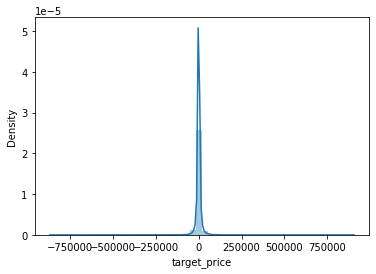

In [ ]:
sns.distplot(y_test-predictions)

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7785.329075923941
MSE: 351592459.10363
RMSE: 18750.79889241069


In [ ]:
# Method-2  Hyper parameter tuning

In [ ]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
print(model.feature_importances_)

[4.12194443e-02 1.94116951e-01 7.45752796e-02 8.76300097e-02
 3.10269599e-01 1.75571002e-02 5.75730574e-02 1.82347855e-03
 5.86850620e-05 2.40165445e-05 1.68298809e-04 7.51846237e-04
 2.95290081e-03 1.91281749e-01 1.71246739e-08 2.39645590e-04
 1.18438829e-03 1.31639218e-05 2.76142236e-03 1.37647275e-02
 3.61095364e-06 2.03060752e-03]


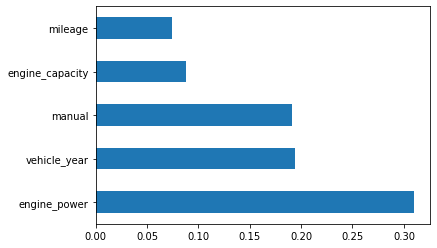

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor=RandomForestRegressor()

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
#from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(X) for X in np.linspace(1, 15, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [20, 65, 110, 155, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 8, 15], 'min_samples_split': [5, 10], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [ ]:

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=1, total=   5.6s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=1, total=   5.6s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=1 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=1, total=   5.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=1 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=1, total=   5.6s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=1 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=1, total=   5.5s
[CV] n_estimators=65, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=1 
[CV]  n_estimators=65, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=1, total=   1.8s
[CV] n_estimators=65, min_samples_split=10, min_samples_leaf=

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 14.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 110}

In [ ]:
rf_random.best_score_

-836514573.1916496

In [ ]:
predictions=rf_random.predict(x_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


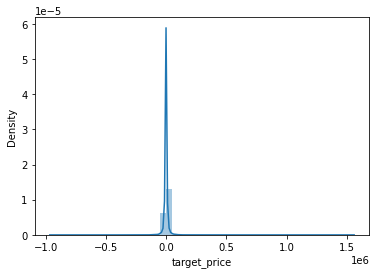

In [ ]:
sns.distplot(y_test-predictions)

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 9119.907271495333
MSE: 651890556.6092741
RMSE: 25532.147512680443
